# https://www.kaggle.com/competitions/playground-series-s3e24/overview

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Loading Train and test data
train_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/machine learning/Project/DataSet/train.csv")
test_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/machine learning/Project/DataSet/test.csv")


In [38]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [39]:
#Checking missing values and duplicates
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0
0
0


In [40]:
#Sampling the data
#For this using Stratified sampling since I want balance of the target variable smoking

from sklearn.model_selection import train_test_split

sampled_df, _ = train_test_split(train_df, train_size=0.13, stratify=train_df['smoking'], random_state=40)
print(len(sampled_df))

20703


In [41]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20703 entries, 105607 to 34263
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20703 non-null  int64  
 1   age                  20703 non-null  int64  
 2   height(cm)           20703 non-null  int64  
 3   weight(kg)           20703 non-null  int64  
 4   waist(cm)            20703 non-null  float64
 5   eyesight(left)       20703 non-null  float64
 6   eyesight(right)      20703 non-null  float64
 7   hearing(left)        20703 non-null  int64  
 8   hearing(right)       20703 non-null  int64  
 9   systolic             20703 non-null  int64  
 10  relaxation           20703 non-null  int64  
 11  fasting blood sugar  20703 non-null  int64  
 12  Cholesterol          20703 non-null  int64  
 13  triglyceride         20703 non-null  int64  
 14  HDL                  20703 non-null  int64  
 15  LDL                  20703 non-

In [42]:
sampled_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,...,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000,20703.000000
mean,79992.953678,44.361204,165.337632,67.125054,82.995537,1.004333,1.000647,1.023282,1.025600,122.471188,...,55.798677,114.310825,14.809709,1.072598,0.892397,25.532870,26.629039,36.405690,0.196445,0.437376
std,45991.026030,11.828478,8.799525,12.519781,8.915482,0.369564,0.373639,0.150800,0.157943,12.684425,...,13.955466,27.112073,1.420698,0.343444,0.176745,8.619282,15.341564,32.377581,0.397318,0.496075
min,4.000000,20.000000,135.000000,30.000000,57.000000,0.100000,0.100000,1.000000,1.000000,81.000000,...,23.000000,10.000000,6.600000,1.000000,0.100000,9.000000,4.000000,5.000000,0.000000,0.000000
25%,40121.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,80446.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,53.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119491.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000,1.000000
max,159249.000000,85.000000,190.000000,125.000000,125.800000,9.900000,9.900000,2.000000,2.000000,199.000000,...,133.000000,1220.000000,19.100000,6.000000,3.400000,180.000000,217.000000,836.000000,1.000000,1.000000


- The participants range from 20 to 85 years, with an average age of about 44 years.
- The average height is approximately 165 cm, and the average weight is around 67 kg.
- The average waist circumference is about 83 cm.
- The average values are close to 1, indicating generally normal eyesight and hearing.
- The average systolic blood pressure is around 122 mmHg.
- The target variable, with approximately 43% of the participants being smokers, which aligns with the full dataset.

## Exploratory Data Analysis

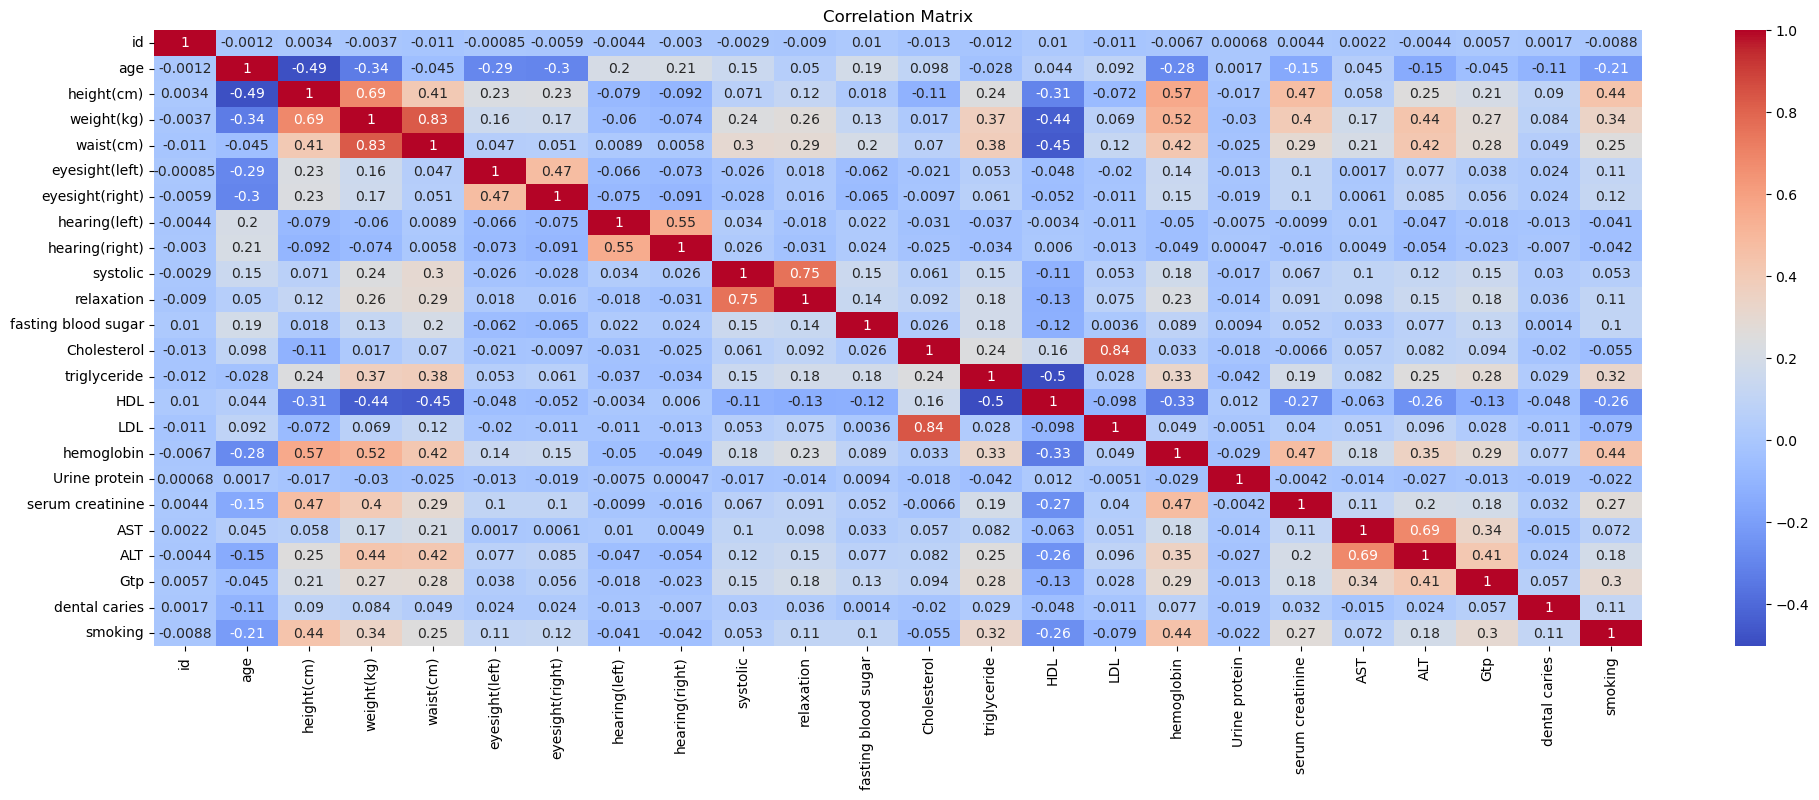

In [43]:
# Correlation heatmap for the sampled dataset
corr = sampled_df.corr()
plt.figure(figsize=(24, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- The correlation heatmap shows weak relationship between the feature and target variable and smoking which indicates that multiple features will be needed to predict
- There is strong correlation between several features like weight and waist circumference

### Dividing features and target variable

In [44]:
X = sampled_df.drop('smoking', axis=1)
y = sampled_df['smoking']

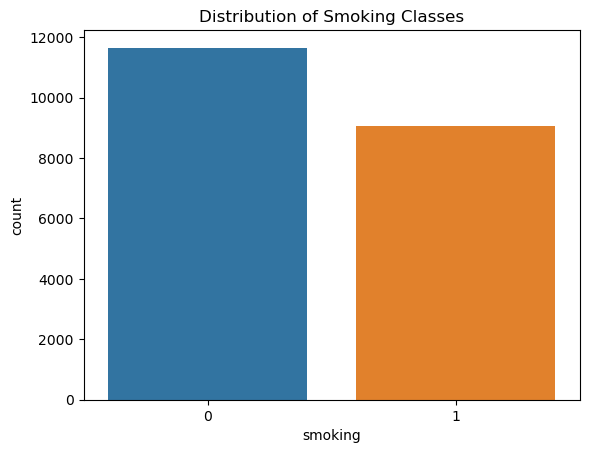

In [45]:
# Check the distribution of the target variable 'smoking'
sns.countplot(x=y)
plt.title('Distribution of Smoking Classes')
plt.show()

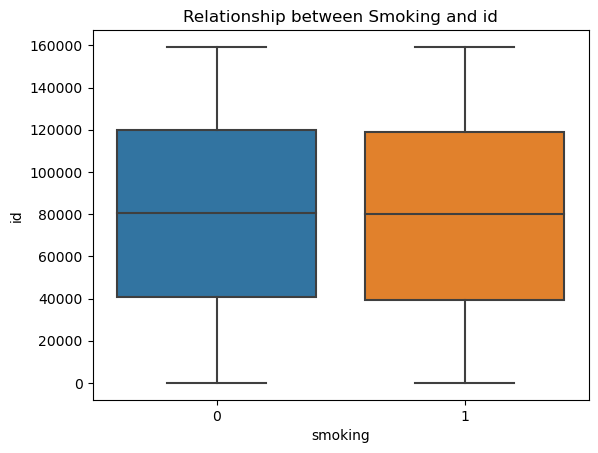

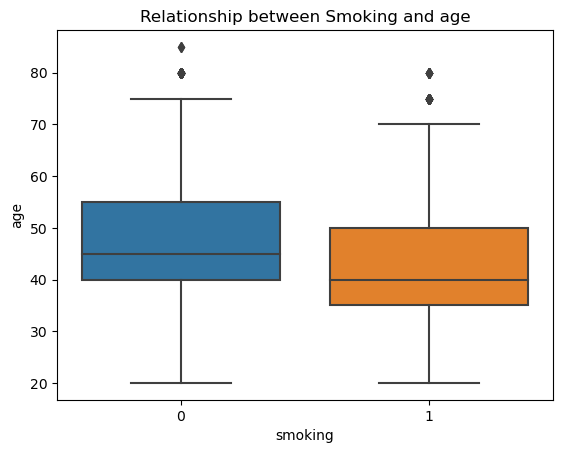

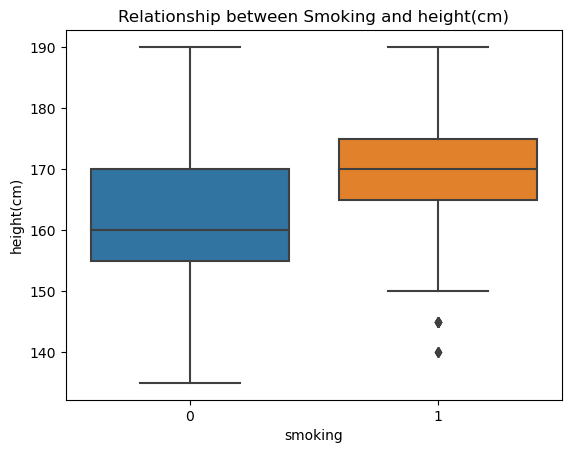

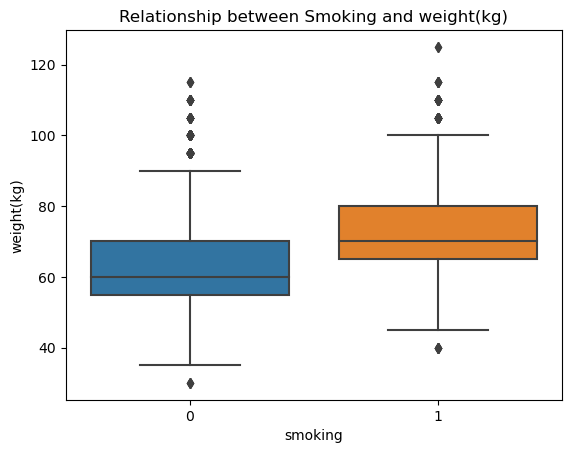

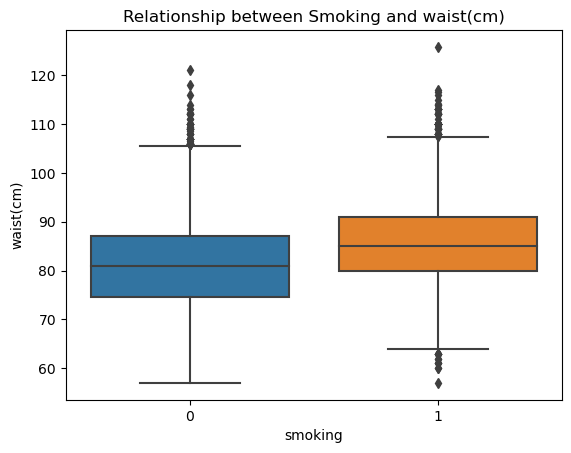

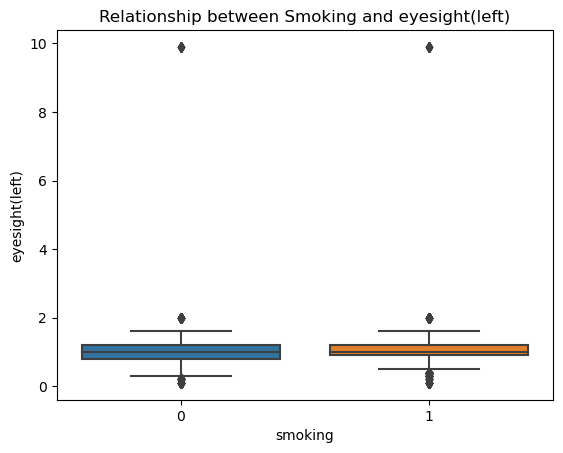

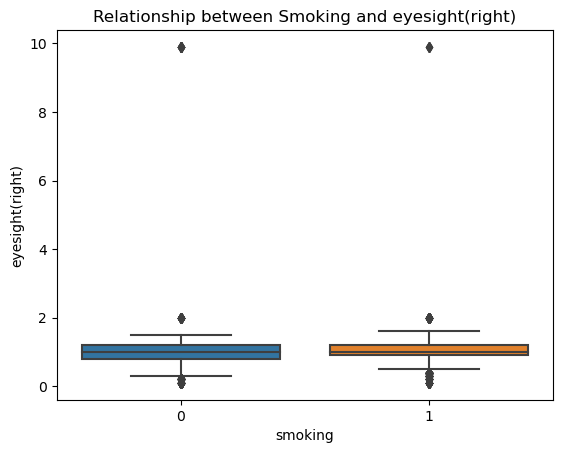

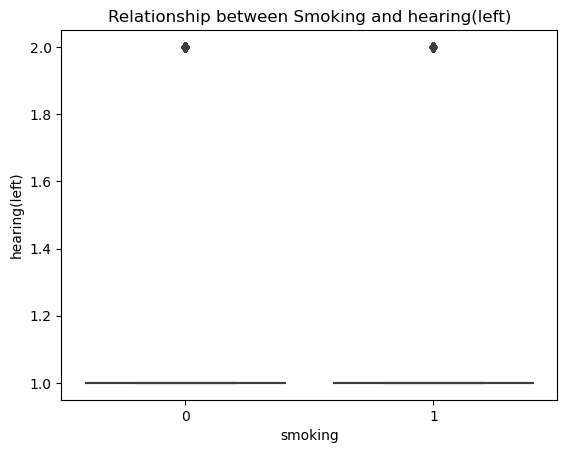

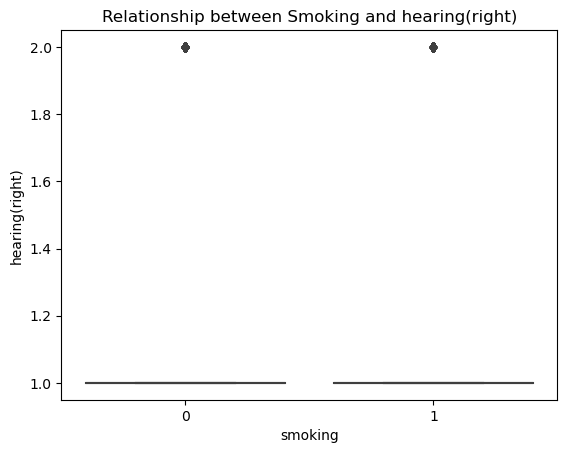

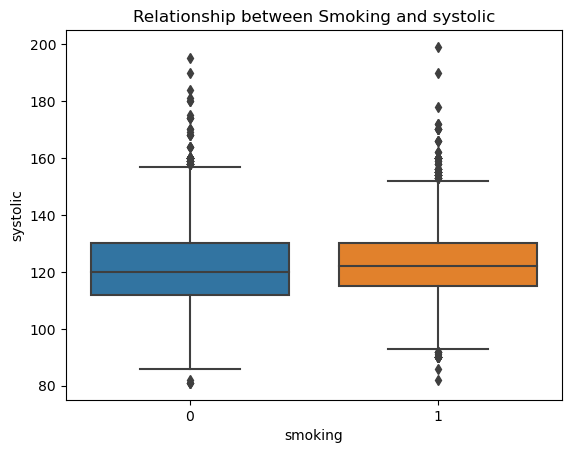

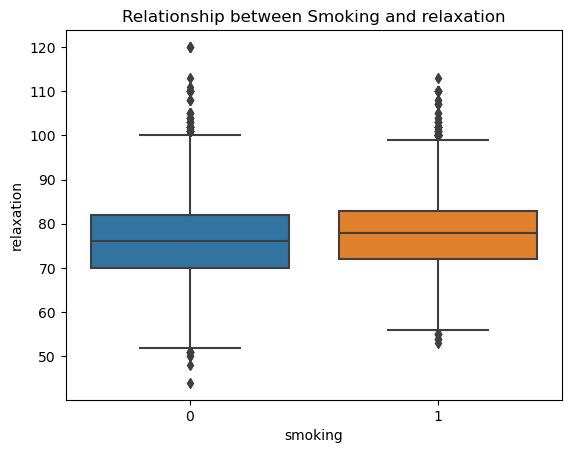

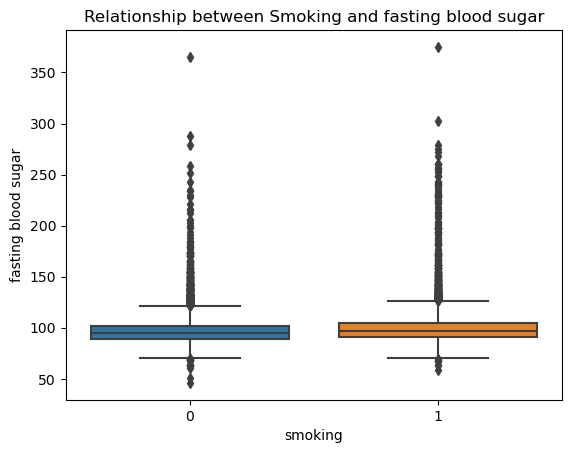

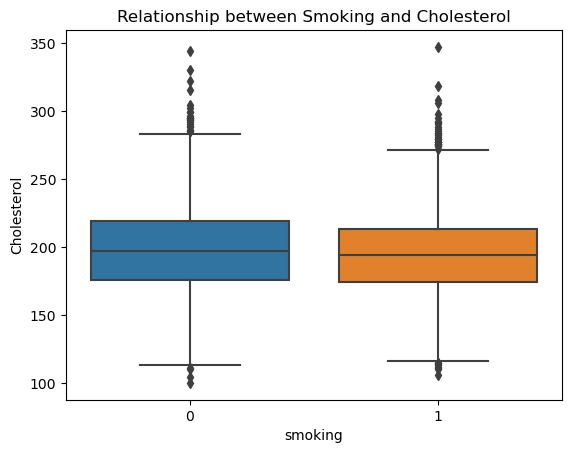

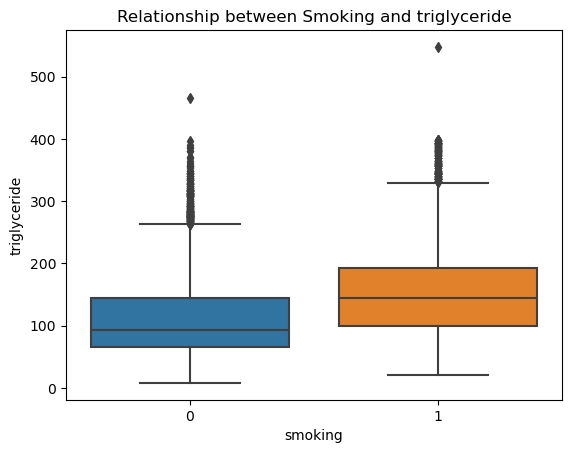

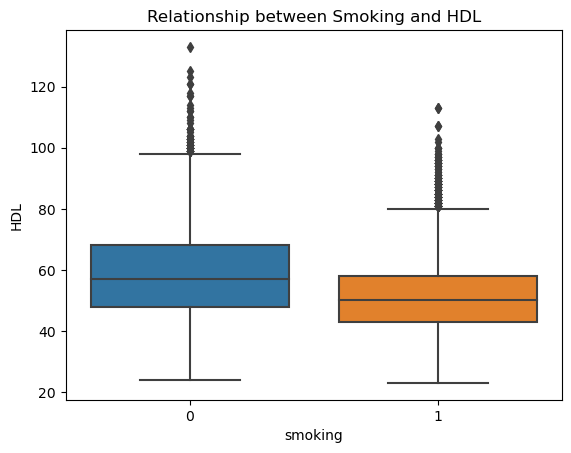

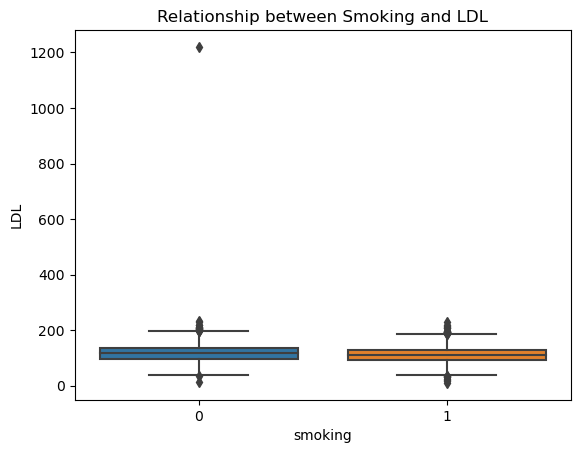

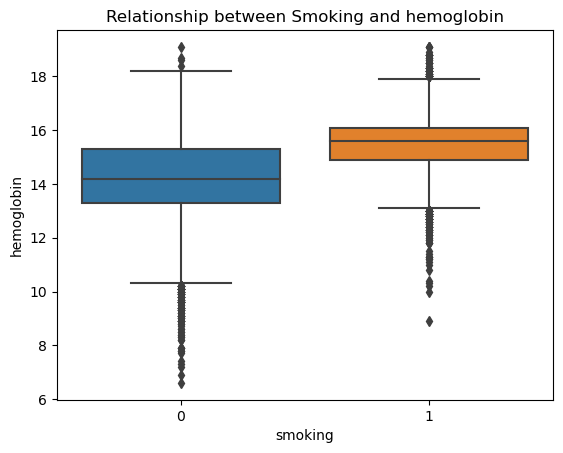

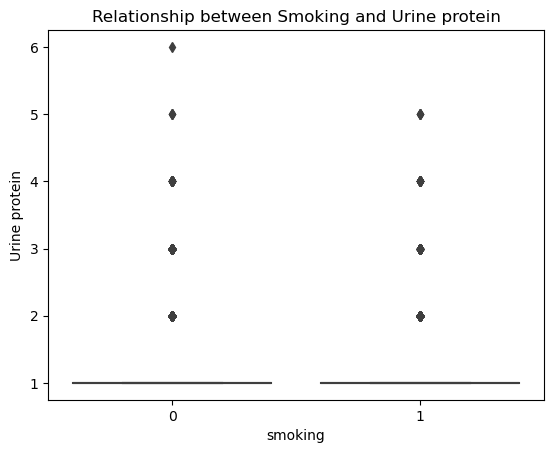

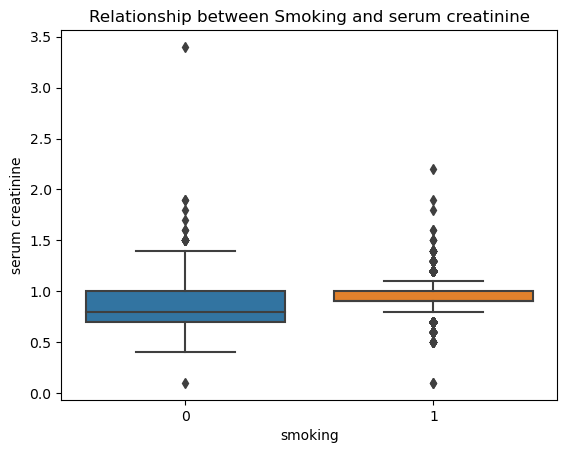

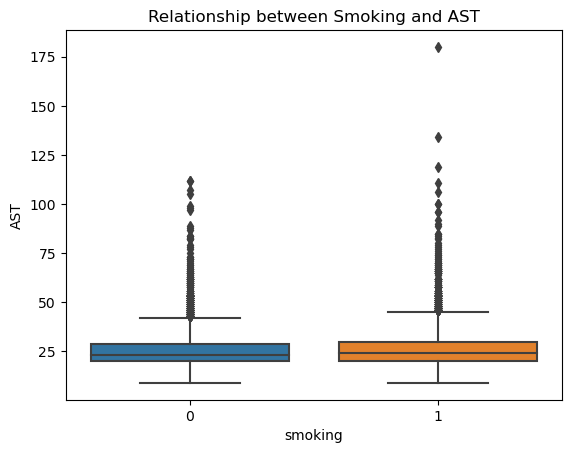

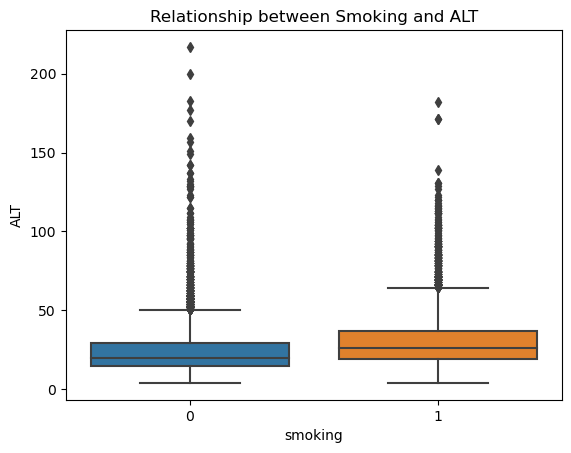

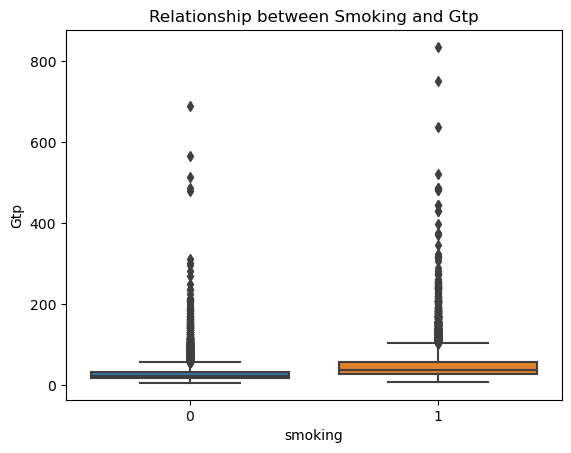

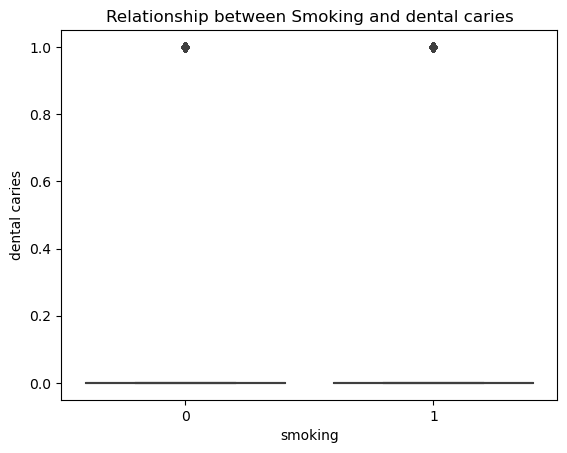

In [46]:
# Boxplots for numerical features against the target variable
for column in X.columns:
    sns.boxplot(x=y, y=X[column])
    plt.title(f'Relationship between Smoking and {column}')
    plt.show()

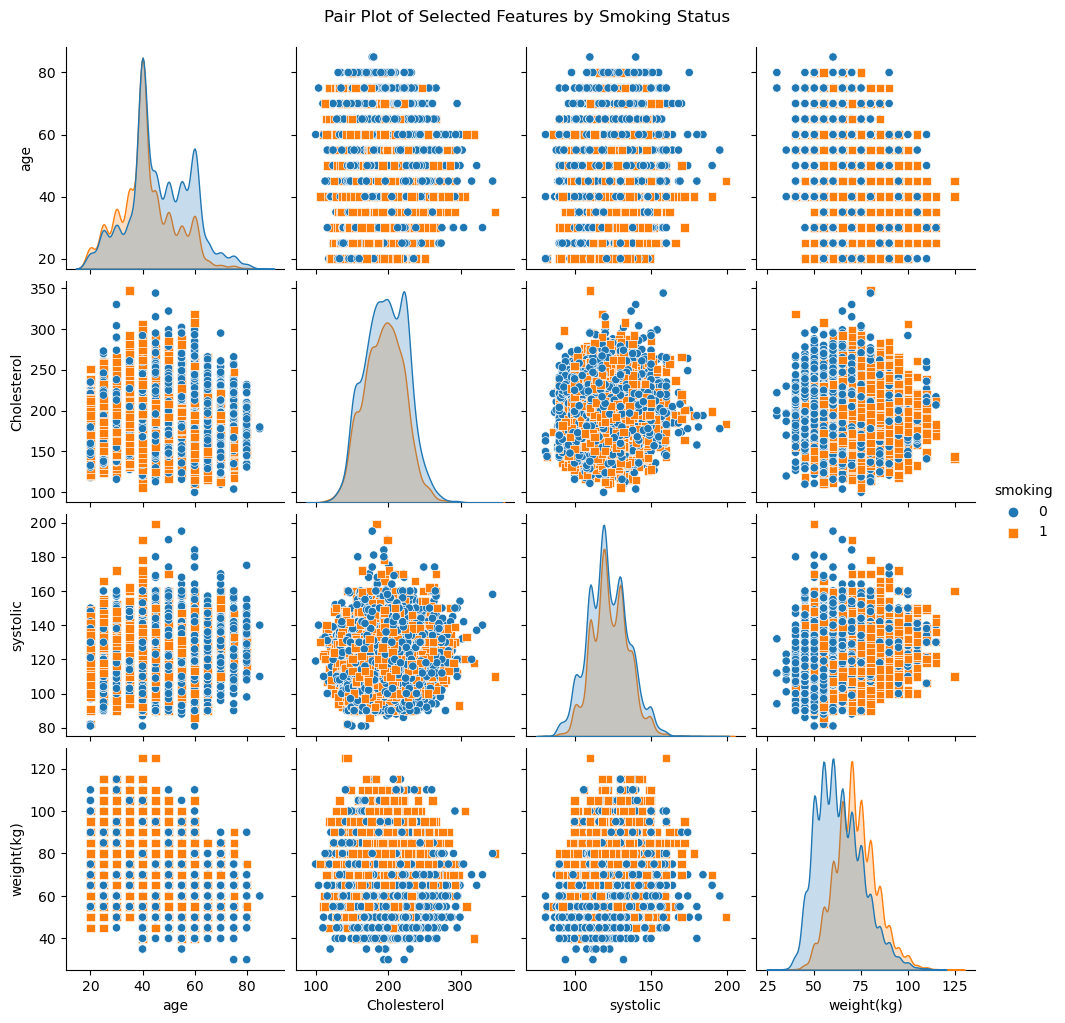

In [47]:
# Selecting a subset of variables for the pair plot
selected_features = ['age', 'Cholesterol', 'systolic', 'weight(kg)', 'smoking']

# Creating the pair plot
sns.pairplot(sampled_df[selected_features], hue='smoking', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Selected Features by Smoking Status', y=1.02)
plt.show()


- Cholesterol levels show a significant overlap between smokers and non-smokers.
- The systolic blood pressure distributions for smokers and non-smokers are quite similar
- The scatter plots between features do not show a strong, consistent pattern that would clearly differentiate smokers from non-smokers.
- distribution of age shows that the non-smoking group has a peak at younger ages 

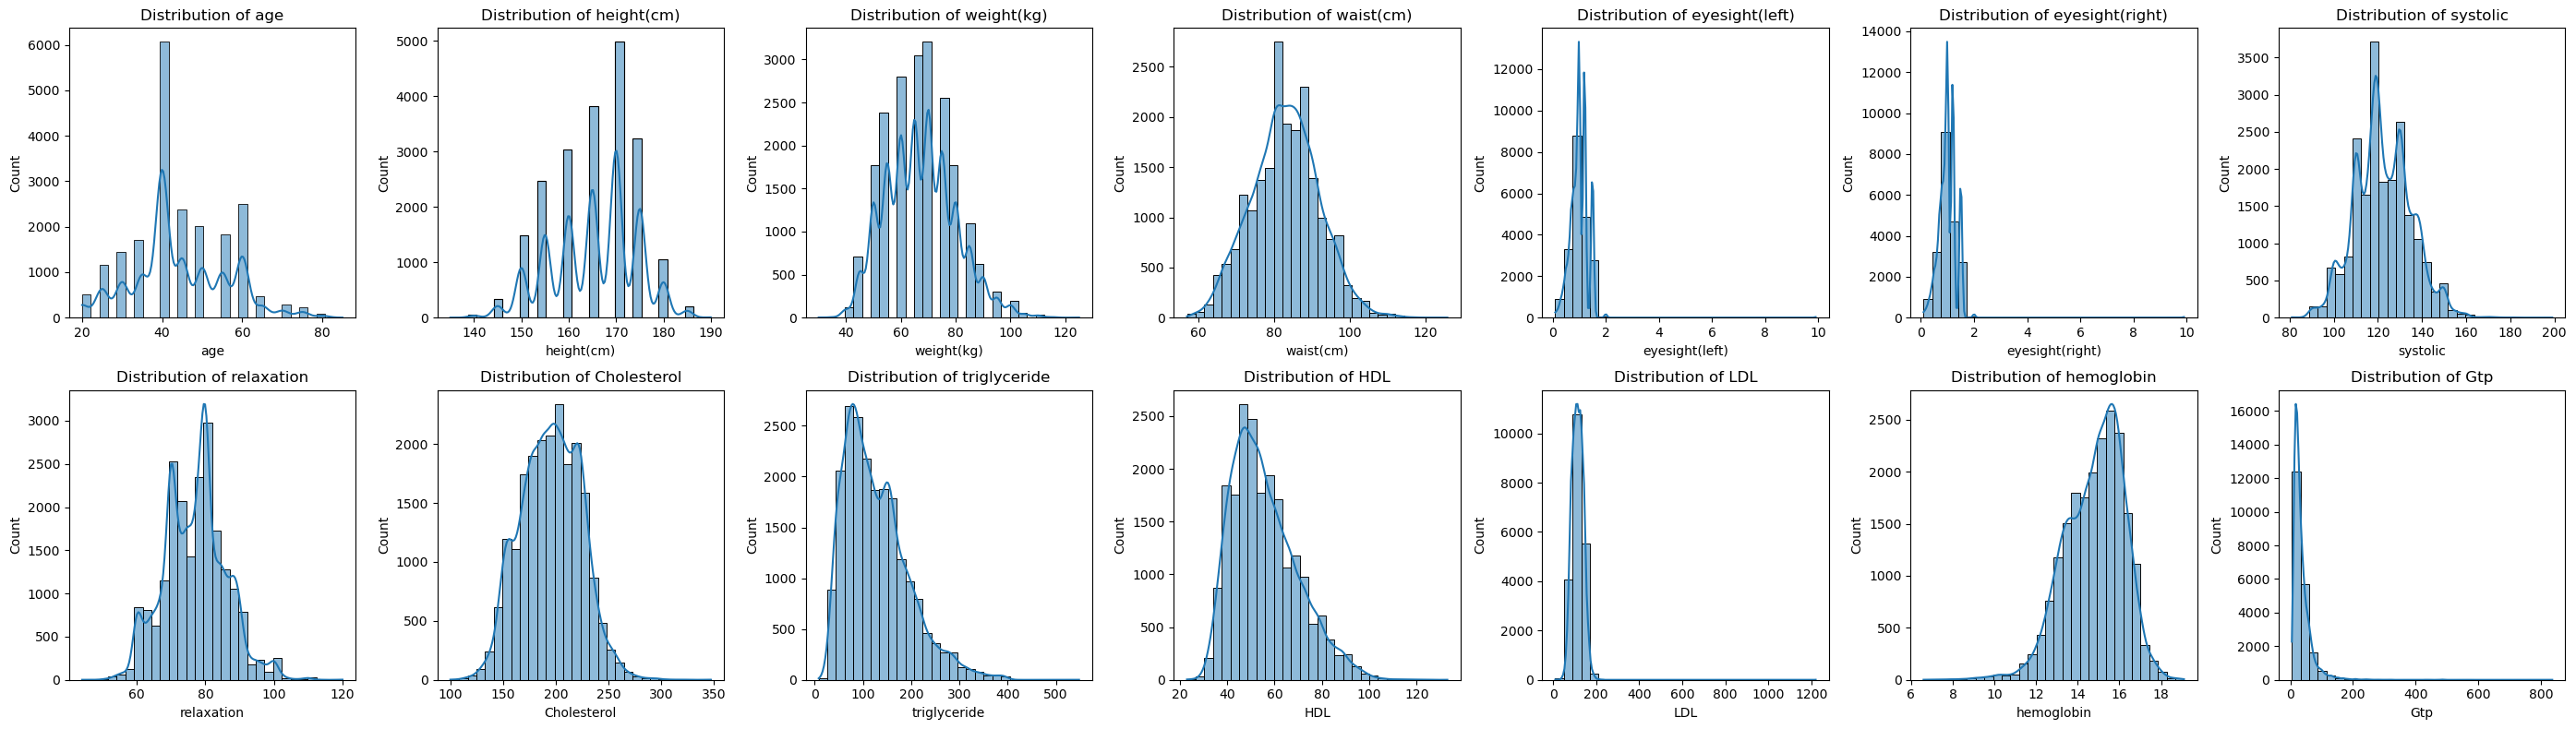

In [53]:
continuous_vars = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic',
                  'relaxation', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Gtp']

# Histograms for continuous variables in the sampled dataframe
plt.figure(figsize=(28, 8))  
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 7, i+1)  
    sns.histplot(sampled_df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()
plt.show()


- Age is distributed with peaks at certain age groups.
- Height appears normally distributed around the mean height.
- Weight shows a normal distribution centered around the average weight.
- Waist a distribution that is somewhat right-side, indicating a few individuals with larger waist sizes.

# Feature Engineering

In [59]:
# Creating new features based on above EDA's
# BMI
sampled_df['BMI'] = sampled_df['weight(kg)'] / (sampled_df['height(cm)']/100)**2

# Eyesight average
sampled_df['eyesight_avg'] = (sampled_df['eyesight(left)'] + sampled_df['eyesight(right)']) / 2

# AST to ALT ratio
sampled_df['AST_to_ALT_ratio'] = sampled_df['AST'] / sampled_df['ALT']

# Total Cholesterol
sampled_df['total_cholesterol'] = sampled_df['HDL'] + sampled_df['LDL']

sampled_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,eyesight_avg,AST_to_ALT_ratio,total_cholesterol
105607,105607,25,175,70,78.0,1.0,1.0,1,1,110,...,1.3,21,23,29,1,1,22.857143,1.00,0.913043,179
115102,115102,40,165,70,89.0,1.2,1.2,1,1,117,...,1.0,30,28,16,0,0,25.711662,1.20,1.071429,185
52630,52630,60,165,65,89.0,1.5,1.2,1,1,130,...,0.5,25,25,38,0,0,23.875115,1.35,1.000000,172
86352,86352,30,165,60,74.0,1.2,1.0,1,1,133,...,0.9,20,24,34,1,1,22.038567,1.10,0.833333,181
17508,17508,55,165,70,86.0,0.8,1.0,1,1,130,...,1.2,27,23,30,0,0,25.711662,0.90,1.173913,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142092,142092,50,150,45,76.0,1.0,0.9,1,1,100,...,0.8,24,18,19,0,0,20.000000,0.95,1.333333,223
49746,49746,65,160,50,77.0,0.6,0.5,1,1,120,...,0.5,20,12,12,0,0,19.531250,0.55,1.666667,189
112490,112490,30,170,65,79.5,1.0,0.8,1,1,122,...,0.8,25,19,14,0,1,22.491349,0.90,1.315789,148
103642,103642,40,155,50,72.0,0.8,0.7,1,1,130,...,0.8,25,20,13,1,0,20.811655,0.75,1.250000,164


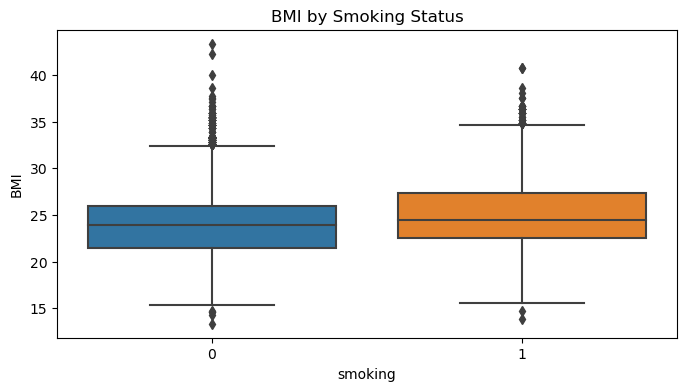

T-test for BMI:
T-statistic: 18.833568260730427
P-value: 1.815806406752802e-78



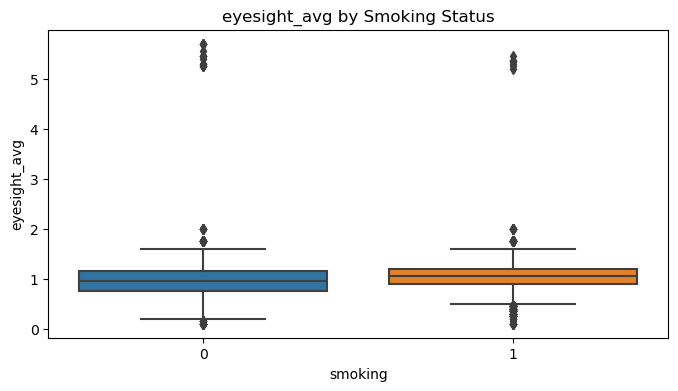

T-test for eyesight_avg:
T-statistic: 19.842062534765873
P-value: 8.273230002539472e-87



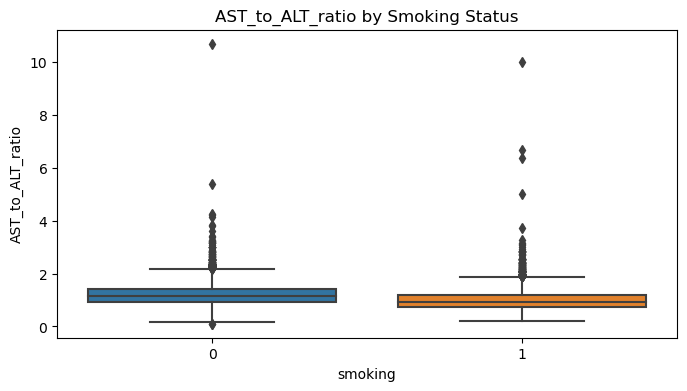

T-test for AST_to_ALT_ratio:
T-statistic: -33.807891941312874
P-value: 6.313336124727843e-244



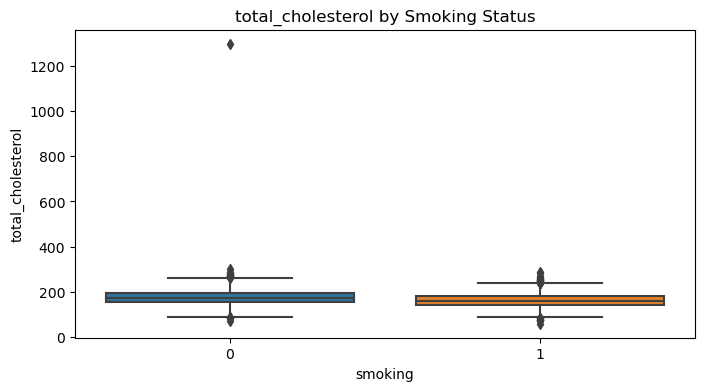

T-test for total_cholesterol:
T-statistic: -29.267583732001164
P-value: 1.5233661609824692e-184



In [60]:
from scipy.stats import ttest_ind

features_to_evaluate = ['BMI', 'eyesight_avg', 'AST_to_ALT_ratio', 'total_cholesterol']

for feature in features_to_evaluate:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='smoking', y=feature, data=sampled_df)
    plt.title(f'{feature} by Smoking Status')
    plt.show()
    
    # Performing a t-test between smokers and non-smokers for each continuous feature
    smokers = sampled_df[sampled_df['smoking'] == 1][feature]
    non_smokers = sampled_df[sampled_df['smoking'] == 0][feature]
    t_stat, p_val = ttest_ind(smokers, non_smokers)
    print(f'T-test for {feature}:\nT-statistic: {t_stat}\nP-value: {p_val}\n')

## Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preparing the features and target variable
X = sampled_df.drop(['smoking', 'id'], axis=1)
y = sampled_df['smoking']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transforming both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Applying Random forest without processing the data and without feature engineering

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=40)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Making predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

# Evaluating the model
print(f'Random Forest ROC AUC Score: {rf_roc_auc}')
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")
print(classification_report(y_test, rf_pred))
plot_roc_curve(fpr, tpr, f'Random Forest (AUC = {auc(fpr, tpr):.2f})')


Random Forest ROC AUC Score: 0.7706848704744255
Random Forest Accuracy: 76.77%
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2330
           1       0.71      0.79      0.75      1811

    accuracy                           0.77      4141
   macro avg       0.77      0.77      0.77      4141
weighted avg       0.77      0.77      0.77      4141



# Implement Logistic regression without processing

In [65]:
from sklearn.linear_model import LogisticRegression

#Initializing logistic regression model
log_reg = LogisticRegression(random_state=42)

#Training the model
log_reg.fit(X_train_scaled, y_train)

#Predict
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred)

# Evaluating the model
print(f'Logistic Regression ROC AUC Score: {log_reg_roc_auc}')
print(f"Logistic Regression Accuracy: {log_reg_accuracy*100:.2f}%")
print(classification_report(y_test, log_reg_pred))


Logistic Regression ROC AUC Score: 0.7445753537632446
Logistic Regression Accuracy: 74.62%
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2330
           1       0.70      0.73      0.72      1811

    accuracy                           0.75      4141
   macro avg       0.74      0.74      0.74      4141
weighted avg       0.75      0.75      0.75      4141



# Implementing Gradient Boosting without preprocessing

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_clf.fit(X_train_scaled, y_train)

# Predict
gbm_probs = gbm_clf.predict_proba(X_test_scaled)[:, 1]
gbm_auc = roc_auc_score(y_test, gbm_probs)
print(f'Gradient Boosting ROC AUC Score: {gbm_auc}')


Gradient Boosting ROC AUC Score: 0.8561385713913305


# Implementing XGBoost without preprocessing

In [67]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train_scaled, y_train)

# Predict
xgb_probs = xgb_clf.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs)

print(f'XGBoost ROC AUC Score: {xgb_auc}')


/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost ROC AUC Score: 0.8470256870863085


# Improving Models Now!!

# Feature selection

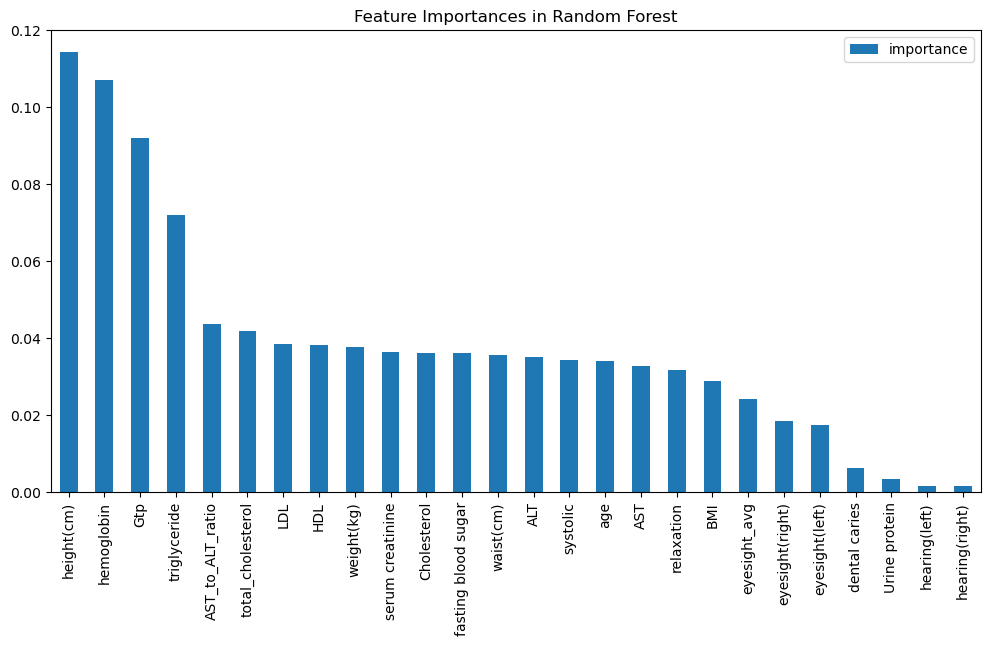

In [69]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
# Plot
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances in Random Forest')
plt.show()

In [72]:
# Converting the scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Feature Selection with Random Forest

In [78]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Choosing top 10 features for the model
N = 10 
top_features = feature_importances.nlargest(N).index

In [89]:
# Retrain the model using only the top N features
rf_top_features_model = RandomForestClassifier(n_estimators=100, random_state=40)
rf_top_features_model.fit(X_train_scaled_df[top_features], y_train)

# Make predictions with the new model
rf_top_features_pred = rf_top_features_model.predict(X_test_scaled_df[top_features])

# Evaluate the new model
rf_top_features_accuracy = accuracy_score(y_test, rf_top_features_pred)
rf_top_features_roc_auc = roc_auc_score(y_test, rf_top_features_pred)
print(f'Improved Random Forest with Top {N} Features ROC AUC Score: {rf_top_features_roc_auc}')
print(f"Improved Random Forest with Top {N} Features Accuracy: {rf_top_features_accuracy*100:.2f}%")
print(classification_report(y_test, rf_top_features_pred))


Improved Random Forest with Top 10 Features ROC AUC Score: 0.7567913537442856
Improved Random Forest with Top 10 Features Accuracy: 75.44%
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2330
           1       0.70      0.78      0.73      1811

    accuracy                           0.75      4141
   macro avg       0.75      0.76      0.75      4141
weighted avg       0.76      0.75      0.76      4141



Selecting Top 10 features reduced my Model's accuracy which it was able to achieve before so will do hyperparameter tuning

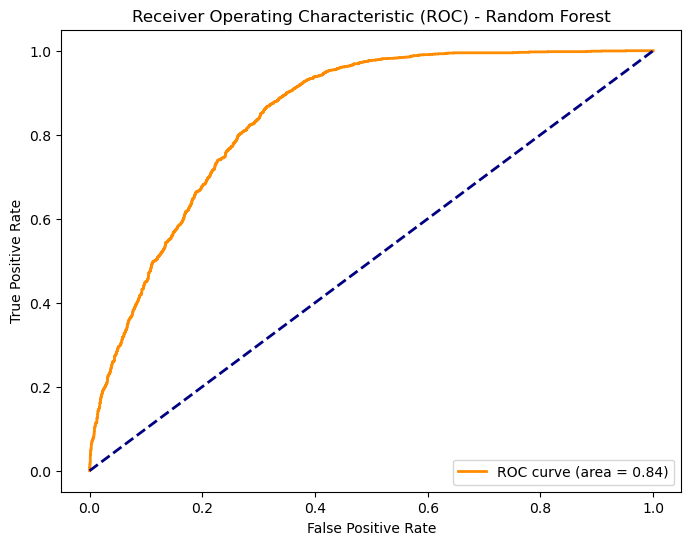

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=300, subsample=0.6; total time=  10.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=300, subsample=1.0; total time=  10.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=300, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, m

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=300, subsample=0.8; total time=  10.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   8.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=300, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=300, subsample=0.6; total time=  10.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=300, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

In [90]:
# Predict probabilities
probs = best_rf_model.predict_proba(X_test_scaled_df[top_features])[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Random Forest - Optimizing hyperparameters

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=40)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, 
                           n_jobs=-1, verbose=2, scoring='roc_auc')

grid_search.fit(X_train_scaled_df, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the new model with the best parameters
best_rf_model_full = grid_search.best_estimator_

# Make predictions
best_rf_pred_full = best_rf_model_full.predict(X_test_scaled_df)

# Evaluating the new model
best_rf_accuracy_full = accuracy_score(y_test, best_rf_pred_full)
best_rf_roc_auc_full = roc_auc_score(y_test, best_rf_pred_full)
print(f'Best Random Forest Model (Full Features) ROC AUC Score: {best_rf_roc_auc_full}')
print(f"Best Random Forest Model (Full Features) Accuracy: {best_rf_accuracy_full*100:.2f}%")
print(classification_report(y_test, best_rf_pred_full))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV] END max_depth=None, ma

/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   4.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=None, max

/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramete

Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest Model (Full Features) ROC AUC Score: 0.7806869322665732
Best Random Forest Model (Full Features) Accuracy: 77.59%
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2330
           1       0.71      0.82      0.76      1811

    accuracy                           0.78      4141
   macro avg       0.78      0.78      0.78      4141
weighted avg       0.78      0.78      0.78      4141



# Using Best Parameter to plot ROC Curve

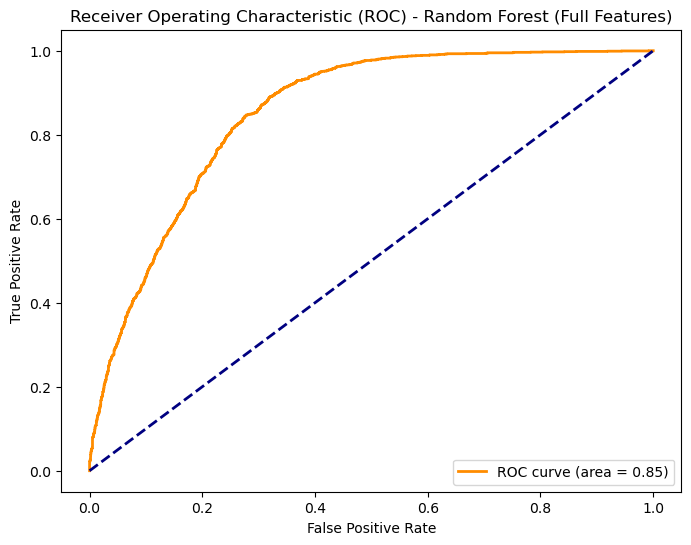

In [81]:
# Predict probabilities for the positive class
best_rf_probs_full = best_rf_model_full.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr_full, tpr_full, _ = roc_curve(y_test, best_rf_probs_full)
roc_auc_full = auc(fpr_full, tpr_full)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_full:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest (Full Features)')
plt.legend(loc="lower right")
plt.show()


# Improving Logistic Regression Using PCA

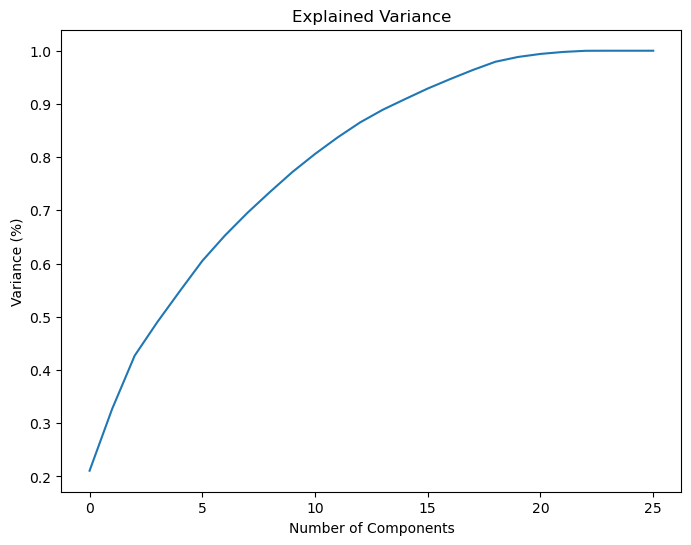

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=30, max_features

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_featur

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=No

In [82]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA().fit(X_train_scaled_df)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


Based on this plot will take 95% of the variance since after that it is constant

In [83]:
from sklearn.pipeline import Pipeline

#Based on the previous plot
n_components = 0.95  
pca = PCA(n_components=n_components)

# Creating a pipeline with PCA and Logistic Regression
log_reg_pca = Pipeline(steps=[('pca', pca), ('logistic', LogisticRegression(random_state=42))])

# Train the model
log_reg_pca.fit(X_train_scaled_df, y_train)

# Predictions
log_reg_pca_pred = log_reg_pca.predict(X_test_scaled_df)

# Evaluate the model
log_reg_pca_accuracy = accuracy_score(y_test, log_reg_pca_pred)
log_reg_pca_roc_auc = roc_auc_score(y_test, log_reg_pca_pred)
print(f'Logistic Regression with PCA ROC AUC Score: {log_reg_pca_roc_auc}')
print(f"Logistic Regression with PCA Accuracy: {log_reg_pca_accuracy*100:.2f}%")
print(classification_report(y_test, log_reg_pca_pred))


Logistic Regression with PCA ROC AUC Score: 0.7419675421778686
Logistic Regression with PCA Accuracy: 74.40%
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2330
           1       0.70      0.73      0.71      1811

    accuracy                           0.74      4141
   macro avg       0.74      0.74      0.74      4141
weighted avg       0.75      0.74      0.74      4141



# Plotting ROC Curve for Logistic Regression

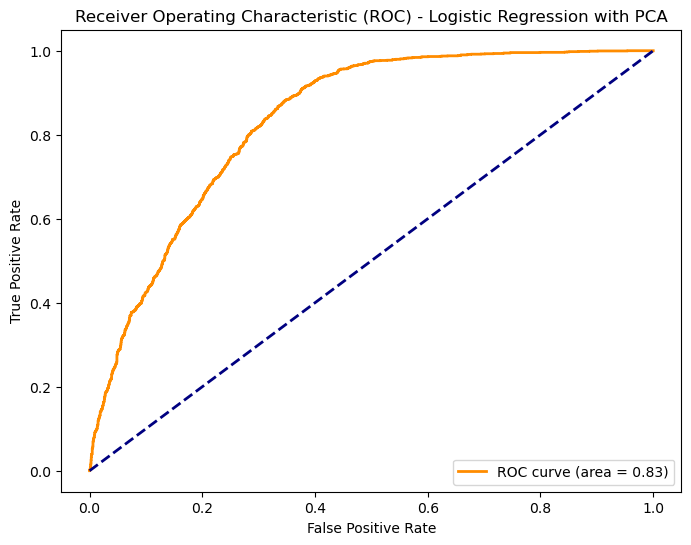

In [84]:
log_reg_pca_probs = log_reg_pca.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr_pca, tpr_pca, _ = roc_curve(y_test, log_reg_pca_probs)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression with PCA')
plt.legend(loc="lower right")
plt.show()


# XGBoost - Hyperparameter Tuning

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled_df, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the new model
best_xgb_model = grid_search.best_estimator_

# Making predictions
best_xgb_pred = best_xgb_model.predict(X_test_scaled_df)

# Evaluate the new model
best_xgb_accuracy = accuracy_score(y_test, best_xgb_pred)
best_xgb_roc_auc = roc_auc_score(y_test, best_xgb_pred)
print(f'Best XGBoost Model ROC AUC Score: {best_xgb_roc_auc}')
print(f"Best XGBoost Model Accuracy: {best_xgb_accuracy*100:.2f}%")
print(classification_report(y_test, best_xgb_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.0

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Model ROC AUC Score: 0.7788105829184075
Best XGBoost Model Accuracy: 77.61%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2330
           1       0.72      0.80      0.76      1811

    accuracy                           0.78      4141
   macro avg       0.77      0.78      0.77      4141
weighted avg       0.78      0.78      0.78      4141



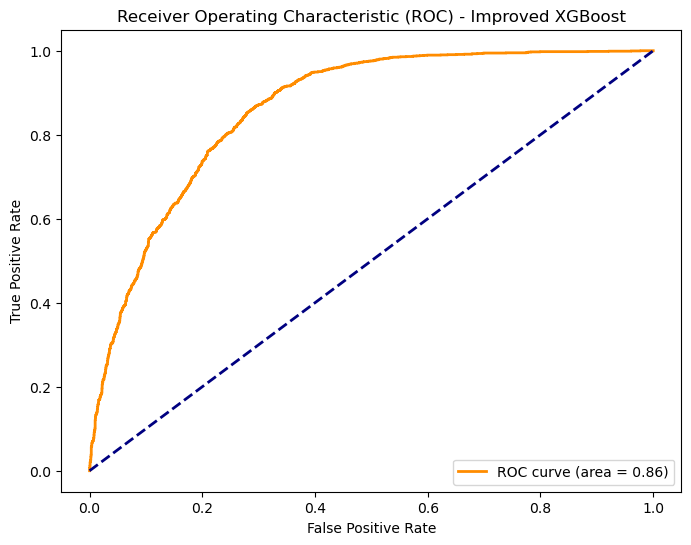

In [88]:
# Predict probabilities
best_xgb_probs = best_xgb_model.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Improved XGBoost')
plt.legend(loc="lower right")
plt.show()

# Making predictions on the test set

In [92]:
# Feature engineering on test set
test_df['BMI'] = test_df['weight(kg)'] / (test_df['height(cm)']/100)**2
test_df['eyesight_avg'] = (test_df['eyesight(left)'] + test_df['eyesight(right)']) / 2
test_df['AST_to_ALT_ratio'] = test_df['AST'] / test_df['ALT']
test_df['total_cholesterol'] = test_df['HDL'] + test_df['LDL']

#Dropping id column from feature set as before
X_test_df = test_df.drop(['id'], axis=1)  

# Transform the test data using the existing scaler
X_test_scaled_df = scaler.transform(X_test_df)


In [93]:
len(X_test_scaled_df)

106171

In [97]:
#Making predictions on the test set with the best model (It was XGBoost - with an area of 0.86)
xgb_pred = best_xgb_model.predict(X_test_scaled_df)

# Assigning predictions to target variable to the original test_df
test_df['smoking'] = xgb_pred

prediction_file_path = "/Users/sahilagrawal/Documents/IT/machine learning/Project/DataSet/submissions.csv"

#Export id and smoking to the csv file to upload on Kaggle competition link
test_df[['id', 'smoking']].to_csv(prediction_file_path, index=False)
